<a href="https://colab.research.google.com/github/NhaBaodang/KT_AI/blob/main/money.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.optimizers import SGD, RMSprop
from keras.models import Sequential, load_model
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils import np_utils, to_categorical, load_img, img_to_array
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten, LeakyReLU

from sklearn import preprocessing
from sklearn.utils import validation
from sklearn.model_selection import train_test_split

In [ ]:
data="/content/drive/MyDrive/Money/"

In [ ]:
Data = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
Train = Data.flow_from_directory(data, target_size=(224,224),batch_size=32, class_mode='categorical')
Train.class_indices

Found 150 images belonging to 6 classes.


{'100000d': 0,
 '10000d': 1,
 '200000d': 2,
 '20000d': 3,
 '500000d': 4,
 '50000d': 5}

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same',input_shape=(224,224,3))) 
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu', kernel_initializer='he_uniform', padding='same')) 
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(256,activation='relu',kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(6,activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 56, 56, 128)       73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 28, 28, 128)     

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
train=model.fit(Train, epochs=50, batch_size=256, verbose=1)

Epoch 1/50
5/5 [==============================] - 29s 4s/step - loss: 73.3793 - accuracy: 0.1800
Epoch 2/50
5/5 [==============================] - 3s 537ms/step - loss: 7.8223 - accuracy: 0.1667
Epoch 3/50
5/5 [==============================] - 3s 535ms/step - loss: 1.8029 - accuracy: 0.1333
Epoch 4/50
5/5 [==============================] - 3s 518ms/step - loss: 1.6379 - accuracy: 0.3067
Epoch 5/50
5/5 [==============================] - 3s 532ms/step - loss: 1.6714 - accuracy: 0.2867
Epoch 6/50
5/5 [==============================] - 3s 535ms/step - loss: 1.4899 - accuracy: 0.3733
Epoch 7/50
5/5 [==============================] - 3s 539ms/step - loss: 1.2644 - accuracy: 0.4867
Epoch 8/50
5/5 [==============================] - 3s 711ms/step - loss: 1.2385 - accuracy: 0.4933
Epoch 9/50
5/5 [==============================] - 3s 509ms/step - loss: 1.1619 - accuracy: 0.5800
Epoch 10/50
5/5 [==============================] - 3s 533ms/step - loss: 1.0494 - accuracy: 0.5400
Epoch 11/50
5/5 [===

In [ ]:
Score=model.evaluate(Train,verbose=0)
print('Hàm Mất Mát Trên Tập Kiểm Tra : ', Score[0])
print('Độ Chính Xác Trên Tập Kiểm Tra : ', Score[1])

Hàm Mất Mát Trên Tập Kiểm Tra :  0.07217484712600708
Độ Chính Xác Trên Tập Kiểm Tra :  0.9800000190734863


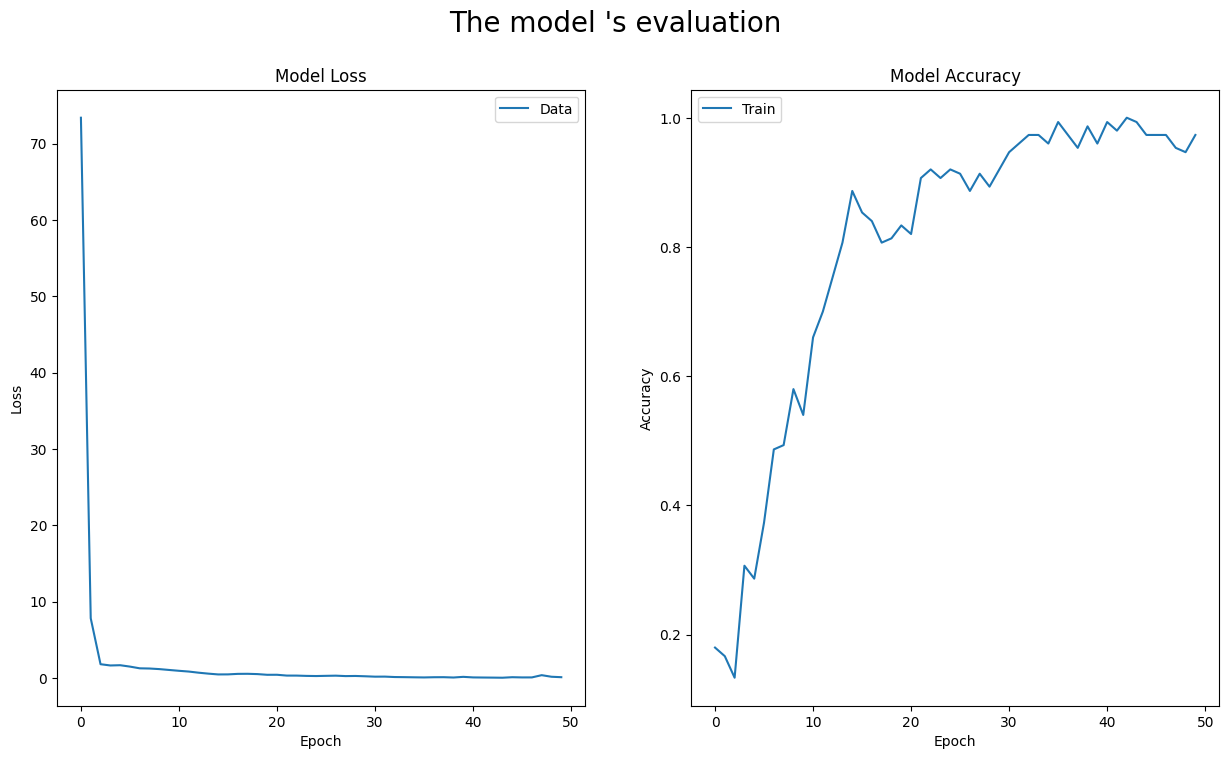

In [ ]:
fig,axes = plt.subplots(1,2, figsize=(15,8))
fig.suptitle("The model 's evaluation ",fontsize=20)

axes[0].plot(train.history['loss'])
axes[0].set_title('Model Loss')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Data'])

axes[1].plot(train.history['accuracy'])
axes[1].set_title('Model Accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train'])
plt.show()

In [ ]:
model.save('/content/driver/MyDrive/money.h5')

In [ ]:
model_1 = load_model('/content/driver/MyDrive/money.h5')

1/1 [==============================] - 0s 225ms/step
Đây là tờ tiền: 10000vnd


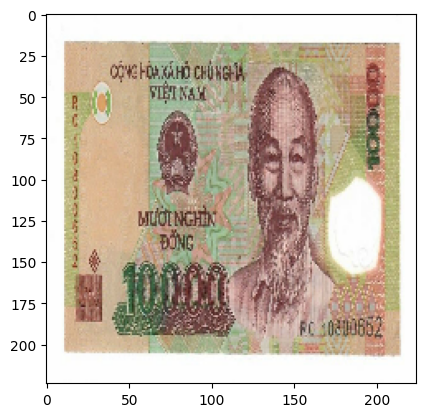

1/1 [==============================] - 0s 18ms/step
Đây là tờ tiền: 20000vnd


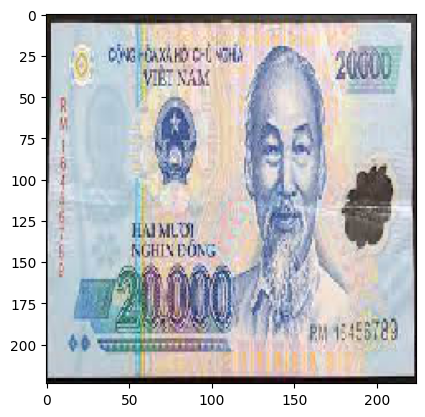

1/1 [==============================] - 0s 24ms/step
Đây là tờ tiền: 50000vnd


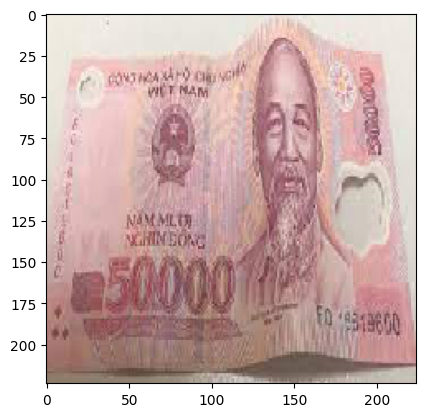

1/1 [==============================] - 0s 19ms/step
Đây là tờ tiền: 100000vnd


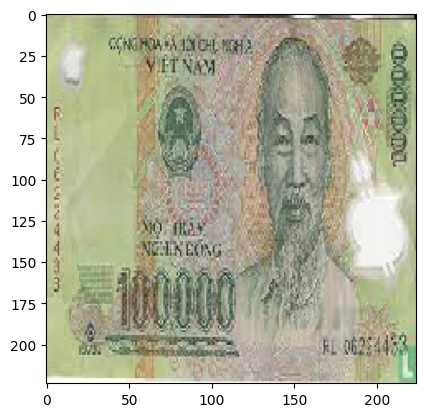

1/1 [==============================] - 0s 18ms/step
Đây là tờ tiền: 200000vnd


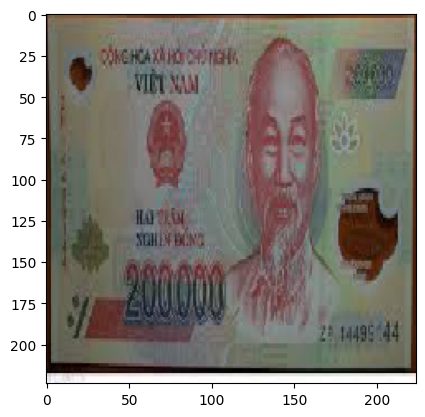

1/1 [==============================] - 0s 28ms/step
Đây là tờ tiền: 20000vnd


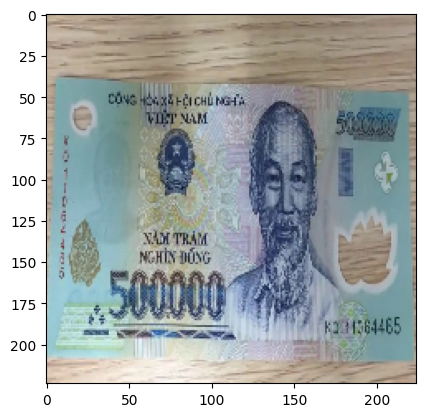

In [ ]:
folder='/content/drive/MyDrive/Text_Money/'
for i in os.listdir(folder):
  img=load_img(folder+i, target_size=(224,224))
  plt.imshow(img)
  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax())
  class_name=['100000vnd', '10000vnd', '200000vnd', '20000vnd', '500000vnd','50000vnd']
  print('Đây là tờ tiền: {}'.format(class_name[result]))
  plt.show()